# Python for scientific computing
Python has extensive packages to help with data analysis:

* numpy: matrices, linear algebra, Fourier transform, pseudorandom number generators
* scipy: advanced linear algebra and maths, signal processing, statistics
* pandas: DataFrames, data wrangling and analysis
* matplotlib: visualizations such as line charts, histograms, scatter plots. 

In [1]:
# Global imports and settings
from preamble import *
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

## NumPy
NumPy is the fundamental package required for high performance scientific computing in Python. It provides:

* `ndarray`: fast and space-efficient n-dimensional numeric array with vectorized arithmetic operations
* Functions for fast operations on arrays without having to write loops
* Linear algebra, random number generation, Fourier transform
* Integrating code written in C, C++, and Fortran (for faster operations)

`pandas` provides a richer, simpler interface to many operations. We'll focus on using `ndarrays` here because they are heavily used in scikit-learn.

### ndarrays
There are several ways to create numpy arrays.

In [2]:
# Convert normal Python array to 1-dimensional numpy array
np.array((1, 2, 53))

array([ 1,  2, 53])

In [3]:
# Convert sequences of sequences of sequences ... to n-dim array
np.array([(1.5, 2, 3), (4, 5, 6)])

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [4]:
# Define element type at creation time
np.array([[1, 2], [3, 4]], dtype=complex)

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Useful properties of ndarrays:

In [5]:
my_array = np.array([[1, 0, 3], [0, 1, 2]])
my_array.ndim     # number of dimensions (axes), also called the rank
my_array.shape    # a matrix with n rows and m columns has shape (n,m)
my_array.size     # the total number of elements of the array
my_array.dtype    # type of the elements in the array
my_array.itemsize # the size in bytes of each element of the array

2

(2, 3)

6

dtype('int64')

8

Quick array creation.  
It is cheaper to create an array with placeholders than extending it later.

In [6]:
np.ones(3) # Default type is float64
np.zeros([2, 2]) 
np.empty([2, 2]) # Fills the array with whatever sits in memory
np.random.random((2,3))
np.random.randint(5, size=(2, 4))

array([1., 1., 1.])

array([[0., 0.],
       [0., 0.]])

array([[0., 0.],
       [0., 0.]])

array([[0.566, 0.788, 0.205],
       [0.163, 0.302, 0.311]])

array([[1, 3, 0, 0],
       [0, 0, 2, 1]])

Create sequences of numbers

In [7]:
np.linspace(0, 1, num=6)   # Linearly distributed numbers between 0 and 1
np.arange(0, 1, step=0.3)  # Fixed step size
np.arange(12).reshape(3,4) # Create and reshape
np.eye(4)                  # Identity matrix

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

array([0. , 0.3, 0.6, 0.9])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result. Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [8]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
a, b
a-b
b**2
a > 32
a += 1
a

(array([20, 30, 40, 50]), array([0, 1, 2, 3]))

array([20, 29, 38, 47])

array([0, 1, 4, 9])

array([False, False,  True,  True])

array([21, 31, 41, 51])

The product operator * operates elementwise.  
The matrix product can be performed using dot() 

In [9]:
A, B = np.array([[1,1], [0,1]]), np.array([[2,0], [3,4]]) # assign multiple variables in one line
A
B
A * B
np.dot(A, B)

array([[1, 1],
       [0, 1]])

array([[2, 0],
       [3, 4]])

array([[2, 0],
       [0, 4]])

array([[5, 4],
       [3, 4]])

In [10]:
a = np.random.random((2,3))
a
a.sum(), a.min(), a.max()

array([[0.388, 0.449, 0.735],
       [0.806, 0.569, 0.274]])

(3.2209077032241096, 0.27447647888930726, 0.8060787669012583)

By specifying the axis parameter you can apply an operation along a specified axis of an array

In [11]:
b = np.arange(12).reshape(3,4)
b
b.sum()
b.sum(axis=0) 
b.sum(axis=1) 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

66

array([12, 15, 18, 21])

array([ 6, 22, 38])

## pandas
pandas is a Python library for data wrangling and analysis. It provides:

* ``DataFrame``: a table, similar to an R DataFrame that holds any structured data
    * Every column can have its own data type (strings, dates, floats,...)
* A great range of methods to apply to this table (sorting, querying, joining,...)
* Imports data from a wide range of data formats (CSV, Excel) and databases (e.g. SQL)

### Series
A one-dimensional array of data (of any numpy type), with indexed values. It can be created by passing a Python list or dict, a numpy array, a csv file,...

In [12]:
import pandas as pd
pd.Series([1,3,np.nan]) # Default integers are integers
pd.Series([1,3,5], index=['a','b','c'])
pd.Series({'a' : 1, 'b': 2, 'c': 3 }) # when given a dict, the keys will be used for the index
pd.Series({'a' : 1, 'b': 2, 'c': 3 }, index = ['b', 'c', 'd']) # this will try to match labels with keys

0    1.0
1    3.0
2    NaN
dtype: float64

a    1
b    3
c    5
dtype: int64

a    1
b    2
c    3
dtype: int64

b    2.0
c    3.0
d    NaN
dtype: float64

### DataFrame
A DataFrame is a tabular data structure with both a row and a column index. It can be created by passing a dict of arrays, a csv file,...

In [18]:
data = {'state': ['Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2001, 2002],
'pop': [1.5, 1.7, 2.4, 2.9]}
df = pd.DataFrame(data)
df
pd.DataFrame(data, columns=['year', 'state', 'pop', 'color']) # Will match indices  

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Nevada,2001,2.4
3,Nevada,2002,2.9


,year,state,pop,color
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2001,Nevada,2.4,NaN
3,2002,Nevada,2.9,NaN


DataFrames can easily read/write data from/to files

* `read_csv(source)`: load CSV data from file or url
* `read_table(source, sep=',')`: load delimited data with separator
* `df.to_csv(target)`: writes the DataFrame to a file

In [20]:
df.to_csv('data.csv', index=False) # Don't export the row index

### Simple operations

In [21]:
df.head() # First 5 rows
df.tail() # Last 5 rows

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Nevada,2001,2.4
3,Nevada,2002,2.9


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Nevada,2001,2.4
3,Nevada,2002,2.9


In [22]:
# Quick stats
df.describe()

,year,pop
count,4.00,4.00
mean,2001.00,2.12
std,0.82,0.64
min,2000.00,1.50
25%,2000.75,1.65
50%,2001.00,2.05
75%,2001.25,2.52
max,2002.00,2.90


In [23]:
# Transpose
df.T

,0,1,2,3
state,Ohio,Ohio,Nevada,Nevada
year,2000,2001,2001,2002
pop,1.5,1.7,2.4,2.9


### Selecting and slicing

In [25]:
df['year'] # Get single column by label
df.year    # Shorthand 

0    2000
1    2001
2    2001
3    2002
Name: year, dtype: int64

0    2000
1    2001
2    2001
3    2002
Name: year, dtype: int64

query() retrieves data matching a boolean expression

In [26]:
df
df.query('year > 2001') # Identical to df[df.A > 0.4]
df.query('pop < year')   # Identical to df[df.A > df.B]

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Nevada,2001,2.4
3,Nevada,2002,2.9


,state,year,pop
3,Nevada,2002,2.9


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Nevada,2001,2.4
3,Nevada,2002,2.9


### Operations
DataFrames offer a [wide range of operations](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html): max, mean, min, sum, std,... 

In [27]:
df.mean()       # Mean of all values per column
df.mean(axis=1) # Other axis: means per row 

year    2001.00
pop        2.12
dtype: float64

0    1000.75
1    1001.35
2    1001.70
3    1002.45
dtype: float64

In [28]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar'], 'B' : ['one', 'one', 'two', 'three'],
                   'C' : np.random.randn(4), 'D' : np.random.randn(4)})
df
df.groupby('A').sum()
df.groupby(['A','B']).sum()

,A,B,C,D
0,foo,one,0.68,-0.49
1,bar,one,0.92,1.12
2,foo,two,-0.47,-0.27
3,bar,three,1.84,0.35


,C,D
A,,
bar,2.76,1.47
foo,0.21,-0.75


C     D
A   B                
bar one    0.92  1.12
    three  1.84  0.35
foo one    0.68 -0.49
    two   -0.47 -0.27

### JOIN
Merge: combine two dataframes based on common keys

In [29]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a'], 'data1': range(3)}) 
df2 = pd.DataFrame({'key': ['a', 'b'], 'data2': range(2)})
df1
df2
pd.merge(df1, df2)

,key,data1
0,b,0
1,b,1
2,a,2


,key,data2
0,a,0
1,b,1


,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0


### CONCAT
Append: append one dataframe to another

In [30]:
df = pd.DataFrame(np.random.randn(2, 4))
df
s = pd.DataFrame(np.random.randn(1,4))
s
df.append(s, ignore_index=True)

,0,1,2,3
0,0.03,0.27,1.01,-0.79
1,-0.19,-1.11,1.73,-1.71


,0,1,2,3
0,0.45,-0.31,1.3,-0.35


,0,1,2,3
0,0.03,0.27,1.01,-0.79
1,-0.19,-1.11,1.73,-1.71
2,0.45,-0.31,1.30,-0.35


Remove duplicates

In [31]:
df = pd.DataFrame({'k1': ['one'] * 3, 'k2': [1, 1, 2]})
df
df.drop_duplicates()

,k1,k2
0,one,1
1,one,1
2,one,2


,k1,k2
0,one,1
2,one,2


Replace values

In [32]:
df = pd.DataFrame({'k1': [1, -1], 'k2': [-1, 2]}) # Say that -1 is a sentinel for missing data
df
df.replace(-1, np.nan)

,k1,k2
0,1,-1
1,-1,2


,k1,k2
0,1.0,NaN
1,NaN,2.0


## matplotlib
[matplotlib](http://matplotlib.sourceforge.net) is the primary scientific plotting library in Python. It provides:

* Publication-quality [visualizations](http://matplotlib.org/gallery.html) such as line charts, histograms, and scatter plots.
* Integration in pandas to make plotting much easier.
* Interactive plotting in Jupyter notebooks for quick visualizations.
    * Requires some setup. See preamble and [%matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html?highlight=matplotlib).
* Many GUI backends, export to PDF, SVG, JPG, PNG, BMP, GIF, etc.
* Ecosystem of libraries for more advanced plotting, e.g. [Seaborn](http://seaborn.pydata.org/)

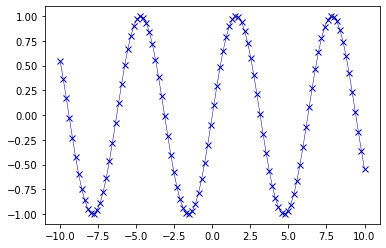

In [33]:
x = np.linspace(-10, 10, 100) # Sequence for X-axis 
y = np.sin(x) # sine values 
p = plt.plot(x, y, marker="x") # Line plot with marker x

### pandas + matplotlib
pandas DataFrames offer an easier, higher-level interface for matplotlib functions

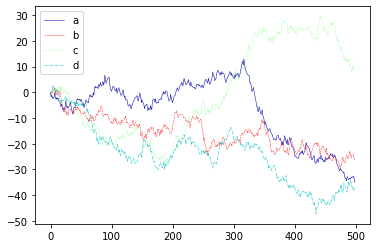

In [34]:
df = pd.DataFrame(np.random.randn(500, 4), 
                  columns=['a', 'b', 'c', 'd']) # random 4D data
p = df.cumsum() # Plot cumulative sum of all series
p.plot();

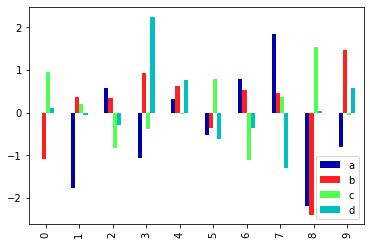

In [35]:
p = df[:10].plot(kind='bar') # First 10 arrays as bar plots  

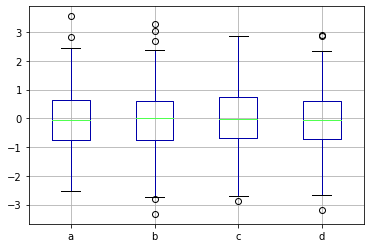

In [36]:
p = df.boxplot() # Boxplot for each of the 4 series

### Advanced plotting libraries
Several libraries, such as [Seaborn](http://seaborn.pydata.org/examples/index.html) offer more advanced plots and easier interfaces. 
![Seaborn Examples](http://ksopyla.com/wp-content/uploads/2016/11/seaborn_examples.jpg)